<a href="https://colab.research.google.com/github/VerFabiola/DATA-MASTER-CHALLLENGE/blob/main/Data%20Exploration%20and%20modeling%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Kaggle library if not installed
!pip install kaggle

# Upload your Kaggle API token
from google.colab import files
files.upload()  # Upload your kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"boonhortan","key":"adb43a6c169673a365b9bb31de4757fb"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:

# Download the Building Data Genome Project 2 dataset
!kaggle datasets download -d claytonmiller/buildingdatagenomeproject2

# Unzip it
!unzip buildingdatagenomeproject2.zip

Dataset URL: https://www.kaggle.com/datasets/claytonmiller/buildingdatagenomeproject2
License(s): CC-BY-SA-4.0
Archive:  buildingdatagenomeproject2.zip
  inflating: chilledwater.csv        
  inflating: chilledwater_cleaned.csv  
  inflating: electricity.csv         
  inflating: electricity_cleaned.csv  
  inflating: gas.csv                 
  inflating: gas_cleaned.csv         
  inflating: hotwater.csv            
  inflating: hotwater_cleaned.csv    
  inflating: irrigation.csv          
  inflating: irrigation_cleaned.csv  
  inflating: metadata.csv            
  inflating: solar.csv               
  inflating: solar_cleaned.csv       
  inflating: steam.csv               
  inflating: steam_cleaned.csv       
  inflating: water.csv               
  inflating: water_cleaned.csv       
  inflating: weather.csv             


In [ ]:
import pandas as pd

metadata = pd.read_csv('metadata.csv')
metadata.head()

,building_id,site_id,building_id_kaggle,site_id_kaggle,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,lng,...,yearbuilt,date_opened,numberoffloors,occupants,energystarscore,eui,site_eui,source_eui,leed_level,rating
0,Panther_lodging_Dean,Panther,NaN,0.0,Lodging/residential,Residence Hall,508.8,5477.0,28.517689,-81.379039,...,1989.0,NaN,NaN,NaN,NaN,271,NaN,NaN,NaN,NaN
1,Panther_lodging_Shelia,Panther,NaN,0.0,Lodging/residential,Residence Hall,929.0,10000.0,28.517689,-81.379039,...,1992.0,NaN,NaN,NaN,NaN,62,NaN,NaN,NaN,NaN
2,Panther_lodging_Ricky,Panther,NaN,0.0,Lodging/residential,Residence Hall,483.1,5200.0,28.517689,-81.379039,...,2016.0,NaN,NaN,NaN,NaN,534,NaN,NaN,NaN,NaN
3,Panther_education_Rosalie,Panther,0.0,0.0,Education,Research,690.5,7432.0,28.517689,-81.379039,...,2008.0,NaN,NaN,NaN,NaN,276,NaN,NaN,NaN,NaN
4,Panther_education_Misty,Panther,1.0,0.0,Education,Research,252.7,2720.0,28.517689,-81.379039,...,2004.0,NaN,NaN,NaN,NaN,375,NaN,NaN,NaN,NaN


In [ ]:
metadata.describe()

In [ ]:
metadata

In [ ]:
metadata.info()

In [ ]:
# Install libraries if needed
!pip install lightgbm xgboost scikit-learn matplotlib seaborn missingno

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
import xgboost as xgb


In [ ]:
# Load electricity_cleaned.csv
elec_df = pd.read_csv('electricity_cleaned.csv')

# Load metadata.csv
meta_df = pd.read_csv('metadata.csv')

# Preview
print(elec_df.head())
#print(meta_df.head())


             timestamp  Panther_parking_Lorriane  Panther_lodging_Cora  \
0  2016-01-01 00:00:00                       NaN                   NaN   
1  2016-01-01 01:00:00                       NaN                   NaN   
2  2016-01-01 02:00:00                       NaN                   NaN   
3  2016-01-01 03:00:00                       NaN                   NaN   
4  2016-01-01 04:00:00                       NaN                   NaN   

   Panther_office_Hannah  Panther_lodging_Hattie  Panther_education_Teofila  \
0                    NaN                     NaN                        NaN   
1                    NaN                     NaN                        NaN   
2                    NaN                     NaN                        NaN   
3                    NaN                     NaN                        NaN   
4                    NaN                     NaN                        NaN   

   Panther_education_Jerome  Panther_retail_Felix  Panther_parking_Asia  \
0    

In [ ]:
elec_df

,timestamp,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
0,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
1,2016-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2,2016-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
3,2016-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
4,2016-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,15.4830,135.2261,3.4357,79.1353,105.6374,465.0898,67.0199,35.7069,16.3231,...,96.925,704.950,111.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17540,2017-12-31 20:00:00,12.7224,135.9262,3.4087,81.6958,107.7348,463.6895,56.6869,35.7069,16.0831,...,97.550,695.700,115.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17541,2017-12-31 21:00:00,11.2822,135.1761,3.3546,82.8160,106.1295,461.2890,55.0576,35.5068,16.1631,...,93.825,687.325,111.650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17542,2017-12-31 22:00:00,16.9233,137.6266,3.2876,82.3359,109.6282,460.5889,49.6776,35.7069,14.8829,...,94.150,674.275,111.950,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#DATA EXPLORATION
- Adding timestamp
- Grouping dat by building types, names, and location(animal)
- PLoting of boxplots of energy consumption by building types and location
- Plot of overall energy consumption trends by building types

In [ ]:
# Load electricity_cleaned.csv
elec_df = pd.read_csv('electricity_cleaned.csv')

# Melt the dataframe into long format
elec_long = elec_df.melt(id_vars='timestamp',
                         var_name='building_name',
                         value_name='meter_reading')

# Convert timestamp
elec_long['timestamp'] = pd.to_datetime(elec_long['timestamp'])

# Drop missing meter_reading (if any)
elec_long = elec_long.dropna()

print(elec_long.head())



               timestamp             building_name  meter_reading
747  2016-02-01 03:00:00  Panther_parking_Lorriane         3.7207
877  2016-02-06 13:00:00  Panther_parking_Lorriane         2.1004
1061 2016-02-14 05:00:00  Panther_parking_Lorriane         3.3006
1201 2016-02-20 01:00:00  Panther_parking_Lorriane         3.4807
1427 2016-02-29 11:00:00  Panther_parking_Lorriane         2.1604


In [ ]:
# Create time features
elec_long['hour'] = elec_long['timestamp'].dt.hour
elec_long['dayofweek'] = elec_long['timestamp'].dt.dayofweek
elec_long['month'] = elec_long['timestamp'].dt.month

# Optional: encode building name
elec_long['building_encoded'] = elec_long['building_name'].astype('category').cat.codes


In [ ]:
# 1. Make sure timestamp is datetime
elec_long['timestamp'] = pd.to_datetime(elec_long['timestamp'])

# 2. Create time features
elec_long['hour'] = elec_long['timestamp'].dt.hour
elec_long['dayofweek'] = elec_long['timestamp'].dt.dayofweek
elec_long['month'] = elec_long['timestamp'].dt.month

# 3. Split building_name into 3 parts
building_split = elec_long['building_name'].str.split('_', expand=True)
elec_long['animal'] = building_split[0]
elec_long['building_type'] = building_split[1]
elec_long['person_name'] = building_split[2]

# 4. Encode animal, building_type, person_name
elec_long['animal_encoded'] = elec_long['animal'].astype('category').cat.codes
elec_long['building_type_encoded'] = elec_long['building_type'].astype('category').cat.codes
elec_long['person_name_encoded'] = elec_long['person_name'].astype('category').cat.codes


# Features (you already created features earlier)
features = ['hour', 'dayofweek', 'month',
            'animal_encoded', 'building_type_encoded', 'person_name_encoded']

X = elec_long[features]
y = elec_long['meter_reading']

# Train-test split (fresh, clean)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# First, melt the data as before
elec_long = elec_df.melt(id_vars='timestamp',
                         var_name='building_name',
                         value_name='meter_reading')

# Drop missing readings
elec_long = elec_long.dropna()

# Split the building_name into three new columns
building_split = elec_long['building_name'].str.split('_', expand=True)
elec_long['animal'] = building_split[0]
elec_long['building_type'] = building_split[1]
elec_long['person_name'] = building_split[2]

# Now you have additional columns!
print(elec_long[['building_name', 'animal', 'building_type', 'person_name']].head())
elec_long

                 building_name   animal building_type person_name
747   Panther_parking_Lorriane  Panther       parking    Lorriane
877   Panther_parking_Lorriane  Panther       parking    Lorriane
1061  Panther_parking_Lorriane  Panther       parking    Lorriane
1201  Panther_parking_Lorriane  Panther       parking    Lorriane
1427  Panther_parking_Lorriane  Panther       parking    Lorriane


,timestamp,building_name,meter_reading,animal,building_type,person_name
747,2016-02-01 03:00:00,Panther_parking_Lorriane,3.7207,Panther,parking,Lorriane
877,2016-02-06 13:00:00,Panther_parking_Lorriane,2.1004,Panther,parking,Lorriane
1061,2016-02-14 05:00:00,Panther_parking_Lorriane,3.3006,Panther,parking,Lorriane
1201,2016-02-20 01:00:00,Panther_parking_Lorriane,3.4807,Panther,parking,Lorriane
1427,2016-02-29 11:00:00,Panther_parking_Lorriane,2.1604,Panther,parking,Lorriane
...,...,...,...,...,...,...
27676279,2017-01-26 07:00:00,Mouse_science_Micheal,1000.0000,Mouse,science,Micheal
27676282,2017-01-26 10:00:00,Mouse_science_Micheal,1000.0000,Mouse,science,Micheal
27676285,2017-01-26 13:00:00,Mouse_science_Micheal,1000.0000,Mouse,science,Micheal
27676288,2017-01-26 16:00:00,Mouse_science_Micheal,1000.0000,Mouse,science,Micheal


In [ ]:
elec_long.describe()

,meter_reading
count,2.521258e+07
mean,1.449146e+02
std,2.688494e+02
min,1.000000e-04
25%,1.937500e+01
50%,5.957000e+01
75%,1.568667e+02
max,2.212280e+05


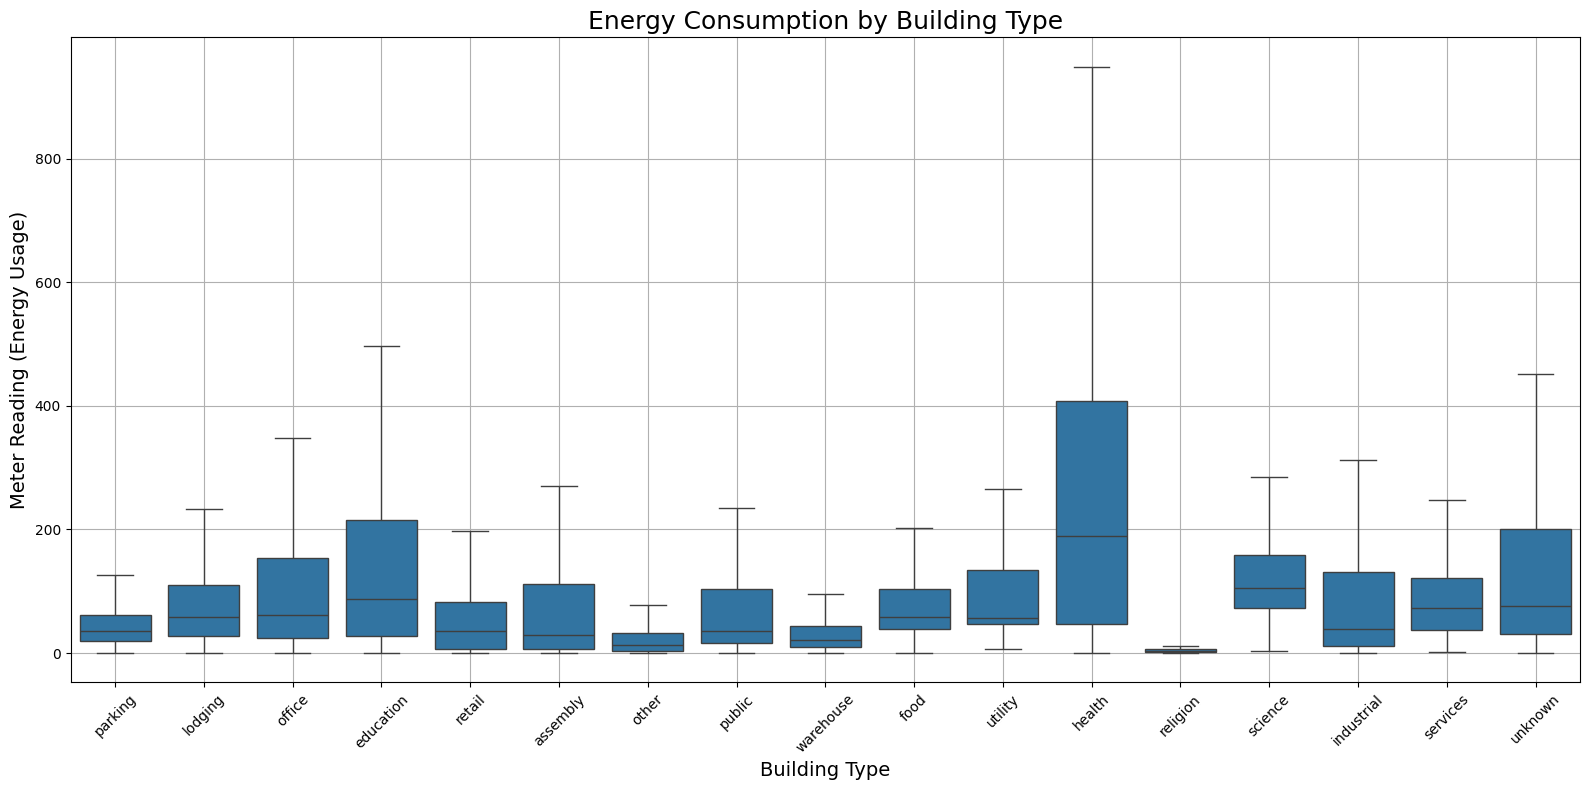

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# (Optional) To make plot bigger
plt.figure(figsize=(16,8))

# Boxplot
sns.boxplot(
    data=elec_long,
    x='building_type',        # X-axis: building type
    y='meter_reading',         # Y-axis: energy reading
    showfliers=False           # Hide extreme outliers (optional: plot cleaner)
)

# Titles and labels
plt.title('Energy Consumption by Building Type', fontsize=18)
plt.xlabel('Building Type', fontsize=14)
plt.ylabel('Meter Reading (Energy Usage)', fontsize=14)
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


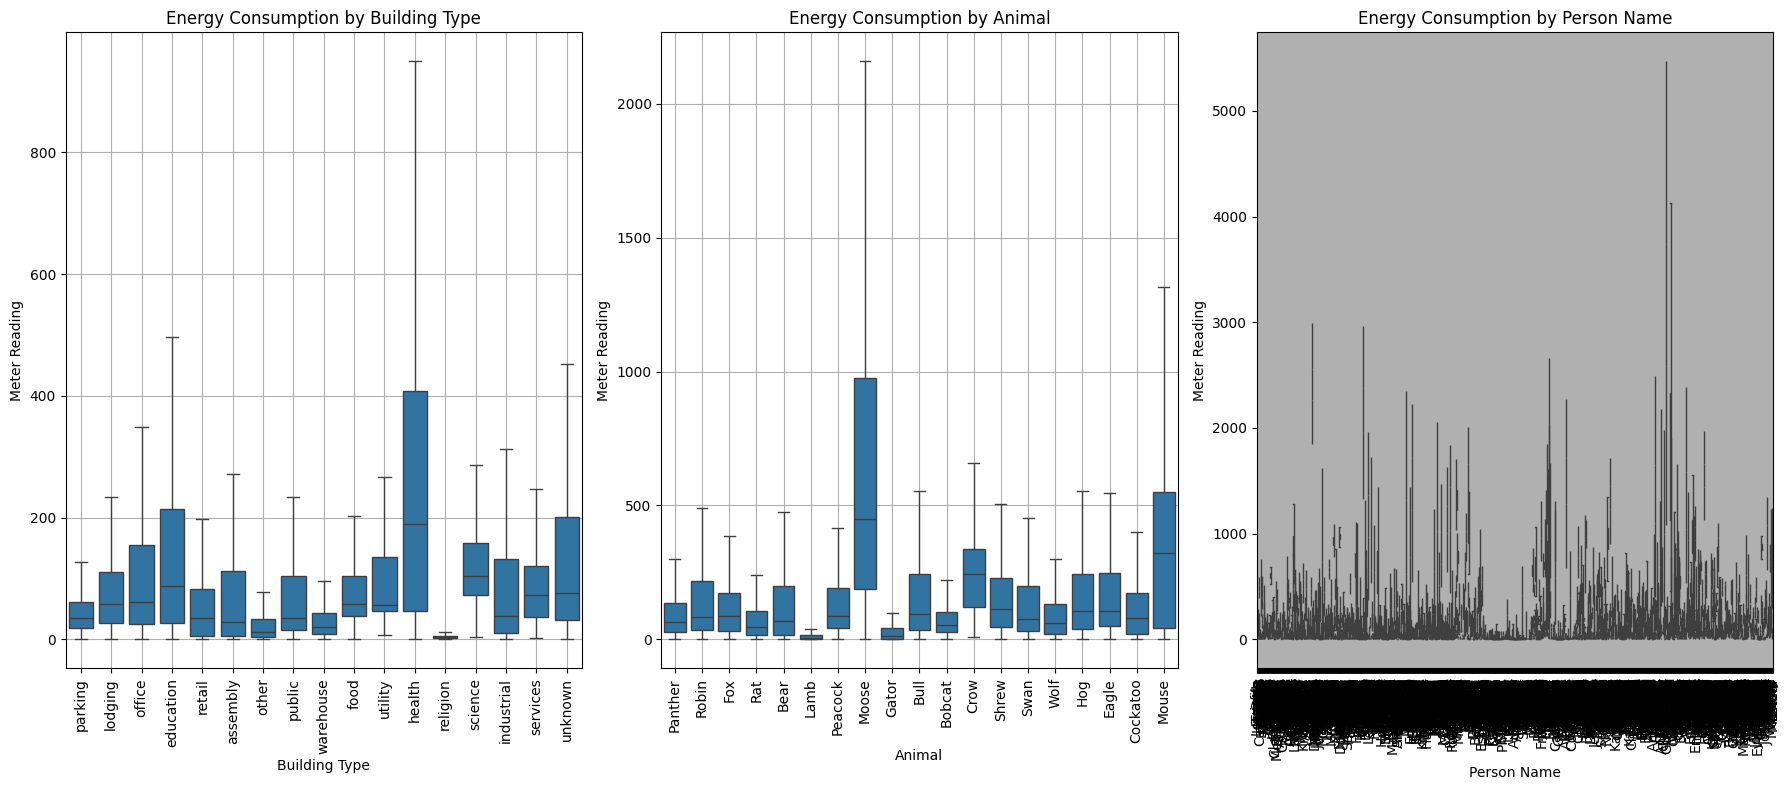

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set larger figure size for all plots
plt.figure(figsize=(18,8))

# ===============================
# 1. Boxplot for Building Type
# ===============================
plt.subplot(1, 3, 1)
sns.boxplot(
    data=elec_long,
    x='building_type',
    y='meter_reading',
    showfliers=False
)
plt.title('Energy Consumption by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Meter Reading')
plt.xticks(rotation=90)
plt.grid(True)

# ===============================
# 2. Boxplot for Animal
# ===============================
plt.subplot(1, 3, 2)
sns.boxplot(
    data=elec_long,
    x='animal',
    y='meter_reading',
    showfliers=False
)
plt.title('Energy Consumption by Animal')
plt.xlabel('Animal')
plt.ylabel('Meter Reading')
plt.xticks(rotation=90)
plt.grid(True)

# ===============================
# 3. Boxplot for Person Name
# ===============================
plt.subplot(1, 3, 3)
sns.boxplot(
    data=elec_long,
    x='person_name',
    y='meter_reading',
    showfliers=False
)
plt.title('Energy Consumption by Person Name')
plt.xlabel('Person Name')
plt.ylabel('Meter Reading')
plt.xticks(rotation=90)
plt.grid(True)

# ===============================
plt.tight_layout()
plt.show()


Health samples: 434000


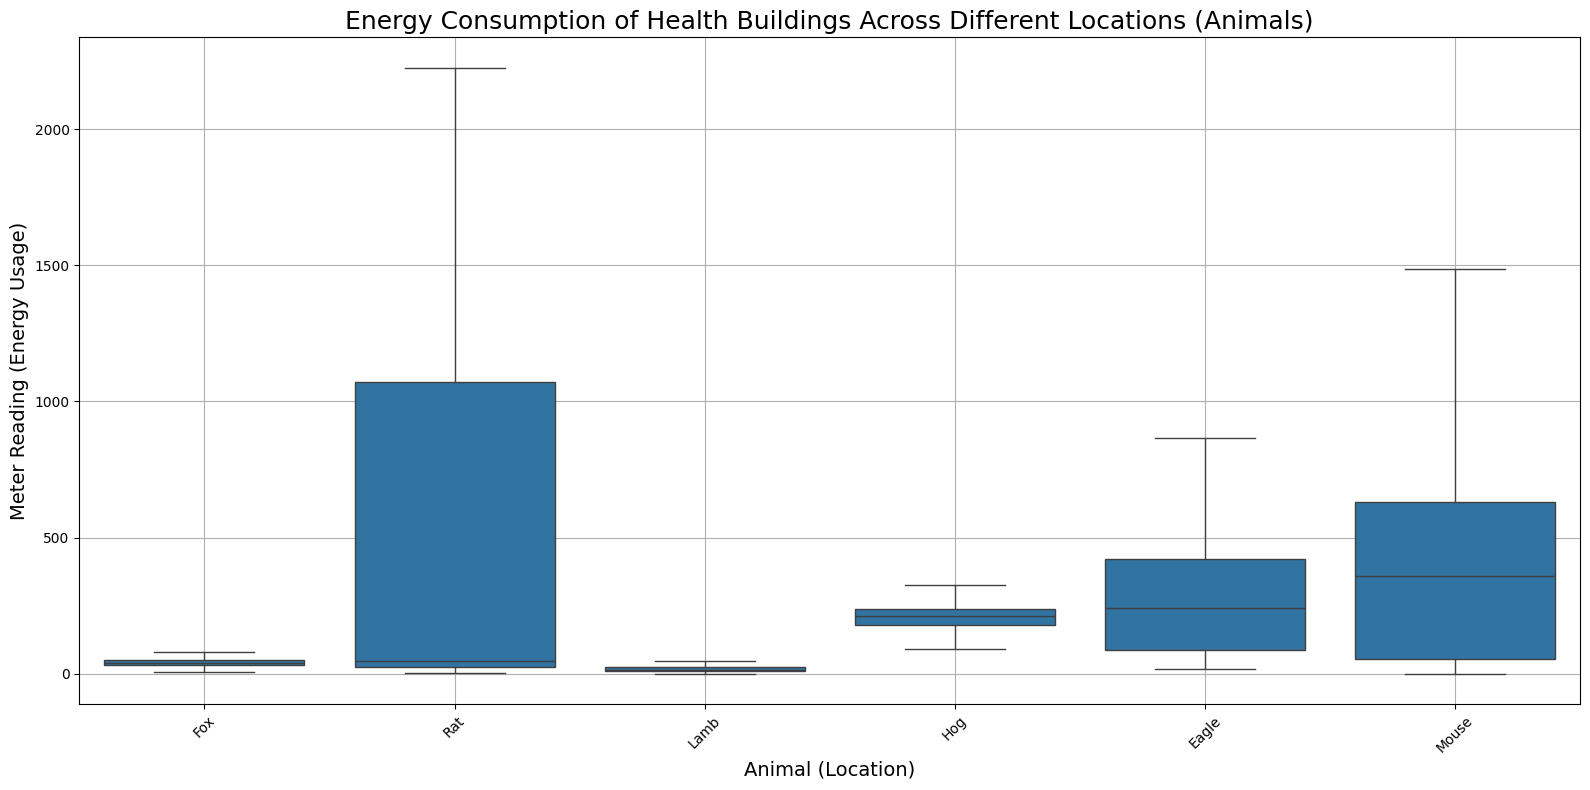

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter only health buildings
health_df = elec_long[elec_long['building_type'] == 'health']

# (Optional) Check how many samples
print(f"Health samples: {len(health_df)}")

# 2. Plot
plt.figure(figsize=(16,8))

sns.boxplot(
    data=health_df,
    x='animal',
    y='meter_reading',
    showfliers=False
)

# Titles and labels
plt.title('Energy Consumption of Health Buildings Across Different Locations (Animals)', fontsize=18)
plt.xlabel('Animal (Location)', fontsize=14)
plt.ylabel('Meter Reading (Energy Usage)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


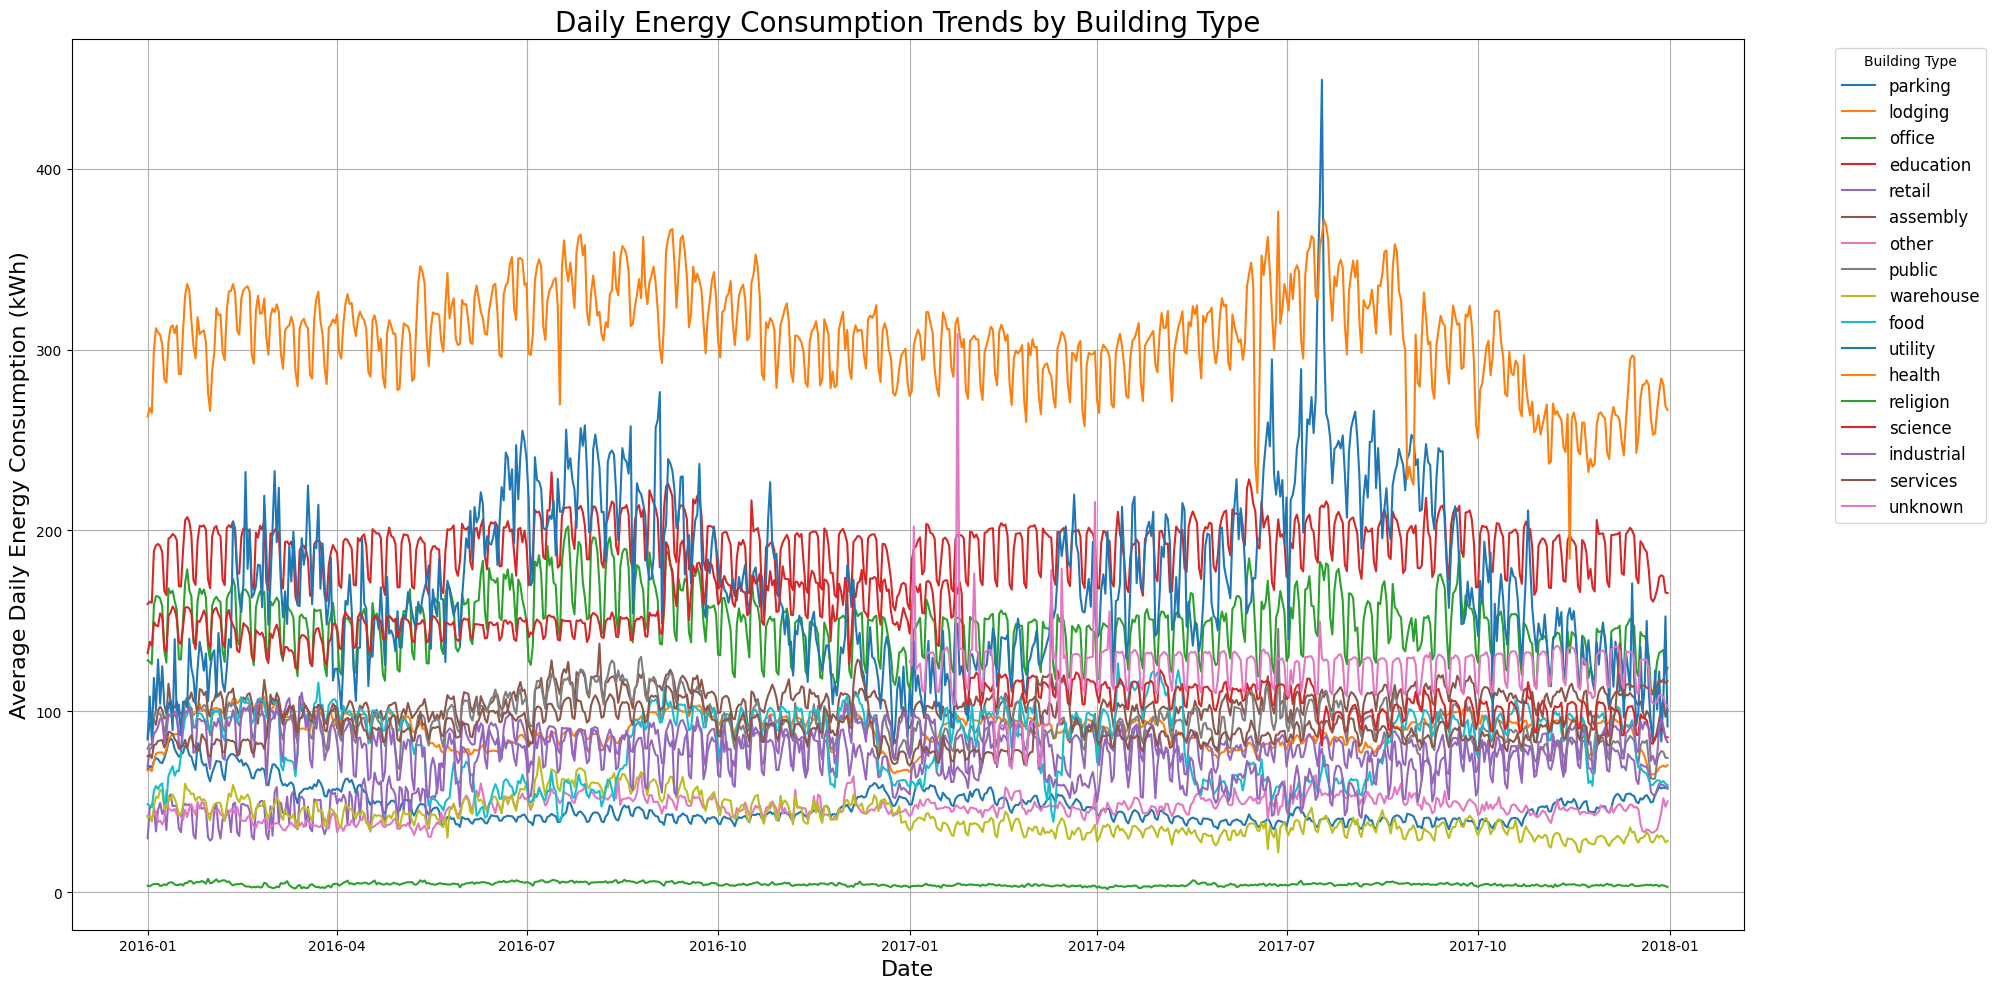

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 🧹 Step 1: Ensure timestamp is datetime and set as index safely

# First: if 'timestamp' is already the index, reset it
if elec_long.index.name == 'timestamp':
    elec_long = elec_long.reset_index()

# Convert timestamp column to datetime (safe)
elec_long['timestamp'] = pd.to_datetime(elec_long['timestamp'])

# Set timestamp as index again
elec_long = elec_long.set_index('timestamp')

# 🧮 Step 2: Group and Resample

# Create a dictionary to hold daily consumption per building type
building_type_trends = {}

# Loop over each unique building type
for building_type in elec_long['building_type'].unique():
    group = elec_long[elec_long['building_type'] == building_type]

    # Resample to daily mean
    daily_avg = group['meter_reading'].resample('D').mean()

    building_type_trends[building_type] = daily_avg

# 🖼️ Step 3: Plotting

plt.figure(figsize=(20,10))

for building_type, daily_avg in building_type_trends.items():
    plt.plot(daily_avg, label=building_type)

plt.title('Daily Energy Consumption Trends by Building Type', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Average Daily Energy Consumption (kWh)', fontsize=16)
plt.legend(title='Building Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



#PREDICITING MODELING
- Ran linear regression and Ligth gradient boosting using as features: building names, timestamp, and location(animal)

In [ ]:
from sklearn.linear_model import LinearRegression

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
preds_lin = linreg.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate(y_true, preds, model_name):
    mse = mean_squared_error(y_true, preds)
    rmse = np.sqrt(mse)  # manually square root
    mae = mean_absolute_error(y_true, preds)
    r2 = r2_score(y_true, preds)
    print(f"{model_name}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R2 : {r2:.4f}\n")


evaluate(y_test, preds_lin, "Linear Regression")


Linear Regression
  RMSE: 260.4161
  MAE: 142.7803
  R2 : 0.0153



In [ ]:
import lightgbm as lgb

# LightGBM Dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parameters (simple)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'verbose': -1,
    'n_jobs': -1,  # Use all CPU cores
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1
}

# Train
# Train without early stopping
lgbm_model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100)

# Predict
preds_lgbm = lgbm_model.predict(X_test)

# Evaluate
evaluate(y_test, preds_lgbm, "LightGBM")


LightGBM
  RMSE: 144.4379
  MAE: 82.5541
  R2 : 0.6971



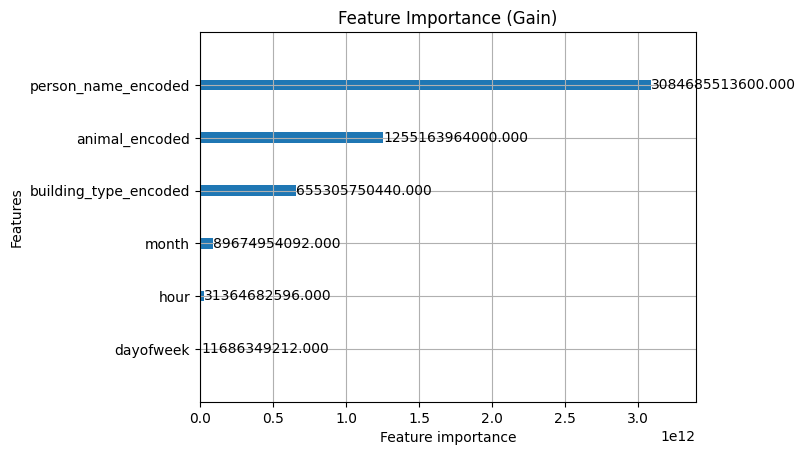

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Correct: use lgbm_model
lgb.plot_importance(lgbm_model, max_num_features=20, importance_type='gain')
plt.title('Feature Importance (Gain)')
plt.show()



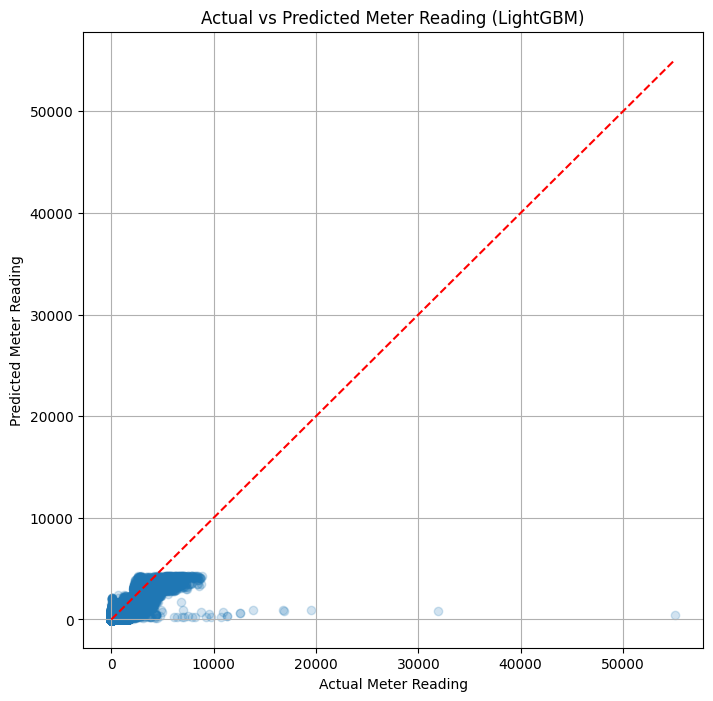

In [ ]:
# Get predictions
y_pred = lgbm_model.predict(X_test)

# Scatter plot
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Meter Reading')
plt.ylabel('Predicted Meter Reading')
plt.title('Actual vs Predicted Meter Reading (LightGBM)')
plt.grid(True)
plt.show()



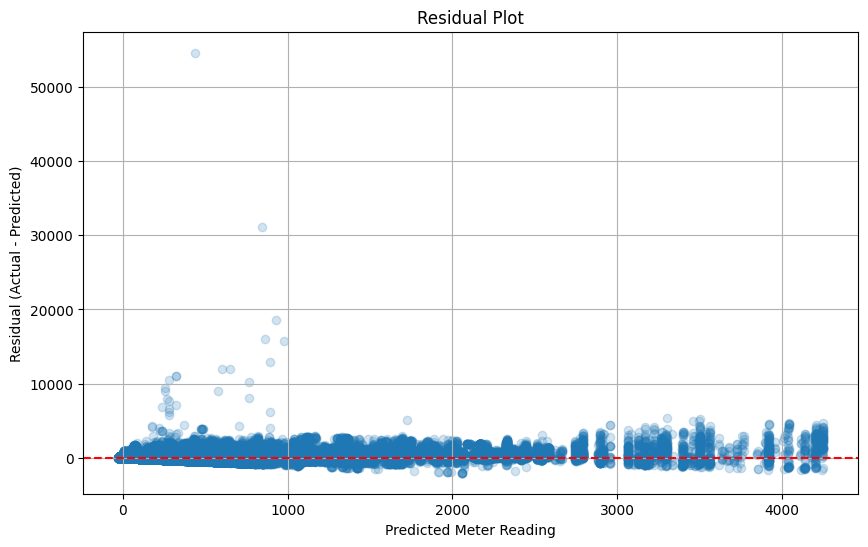

In [ ]:
import numpy as np

# Residuals
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Meter Reading')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


In [ ]:
lgbm_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    num_leaves=31,
    boosting_type='gbdt',
    random_state=42,
    n_jobs=-1
)

lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    early_stopping_rounds=10,
    verbose=10
)


TypeError: LGBMRegressor.fit() got an unexpected keyword argument 'early_stopping_rounds'

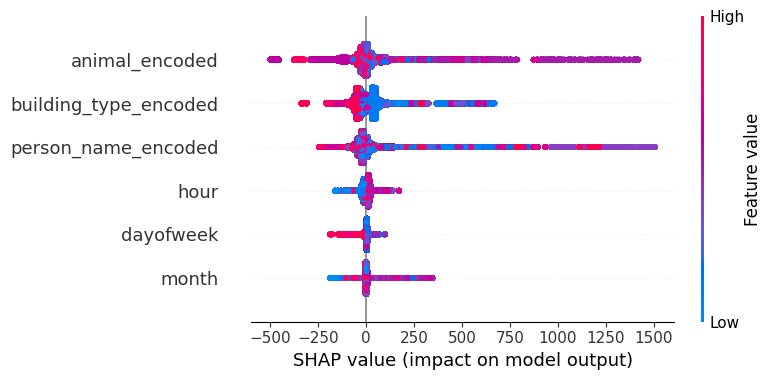

In [ ]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(lgbm_model)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)


#Outliers Identification
-Replacing the outliers of the meter_reading by their mean value the building_type

In [ ]:
# Calculate average meter reading per person within each building type
avg_reading = elec_long.groupby(['building_type', 'person_name'])['meter_reading'].mean().reset_index()

avg_reading.rename(columns={'meter_reading': 'avg_meter_reading'}, inplace=True)

print(avg_reading.head())


  building_type person_name  avg_meter_reading
0      assembly        Adam          70.606871
1      assembly      Adolfo          34.980131
2      assembly    Adrianne         233.132415
3      assembly       Aisha          81.528960
4      assembly       Alden           1.239855


In [ ]:
# Calculate μ (mean) and σ (std) for each building_type
stats = avg_reading.groupby('building_type')['avg_meter_reading'].agg(['mean', 'std']).reset_index()
stats.rename(columns={'mean': 'mu', 'std': 'sigma'}, inplace=True)

print(stats.head())


  building_type          mu       sigma
0      assembly  100.483166  179.119232
1     education  189.514442  296.336438
2          food   82.751219   59.595482
3        health  300.893278  360.028389
4    industrial   76.274209   72.793811


In [ ]:
# Merge mean and std back into avg_reading
avg_reading = avg_reading.merge(stats, on='building_type', how='left')

# Determine if each person is an outlier
avg_reading['is_outlier'] = avg_reading['avg_meter_reading'] > (avg_reading['mu'] + 2*avg_reading['sigma'])

print(avg_reading.head())


  building_type person_name  avg_meter_reading          mu       sigma  \
0      assembly        Adam          70.606871  100.483166  179.119232   
1      assembly      Adolfo          34.980131  100.483166  179.119232   
2      assembly    Adrianne         233.132415  100.483166  179.119232   
3      assembly       Aisha          81.528960  100.483166  179.119232   
4      assembly       Alden           1.239855  100.483166  179.119232   

   is_outlier  
0       False  
1       False  
2       False  
3       False  
4       False  


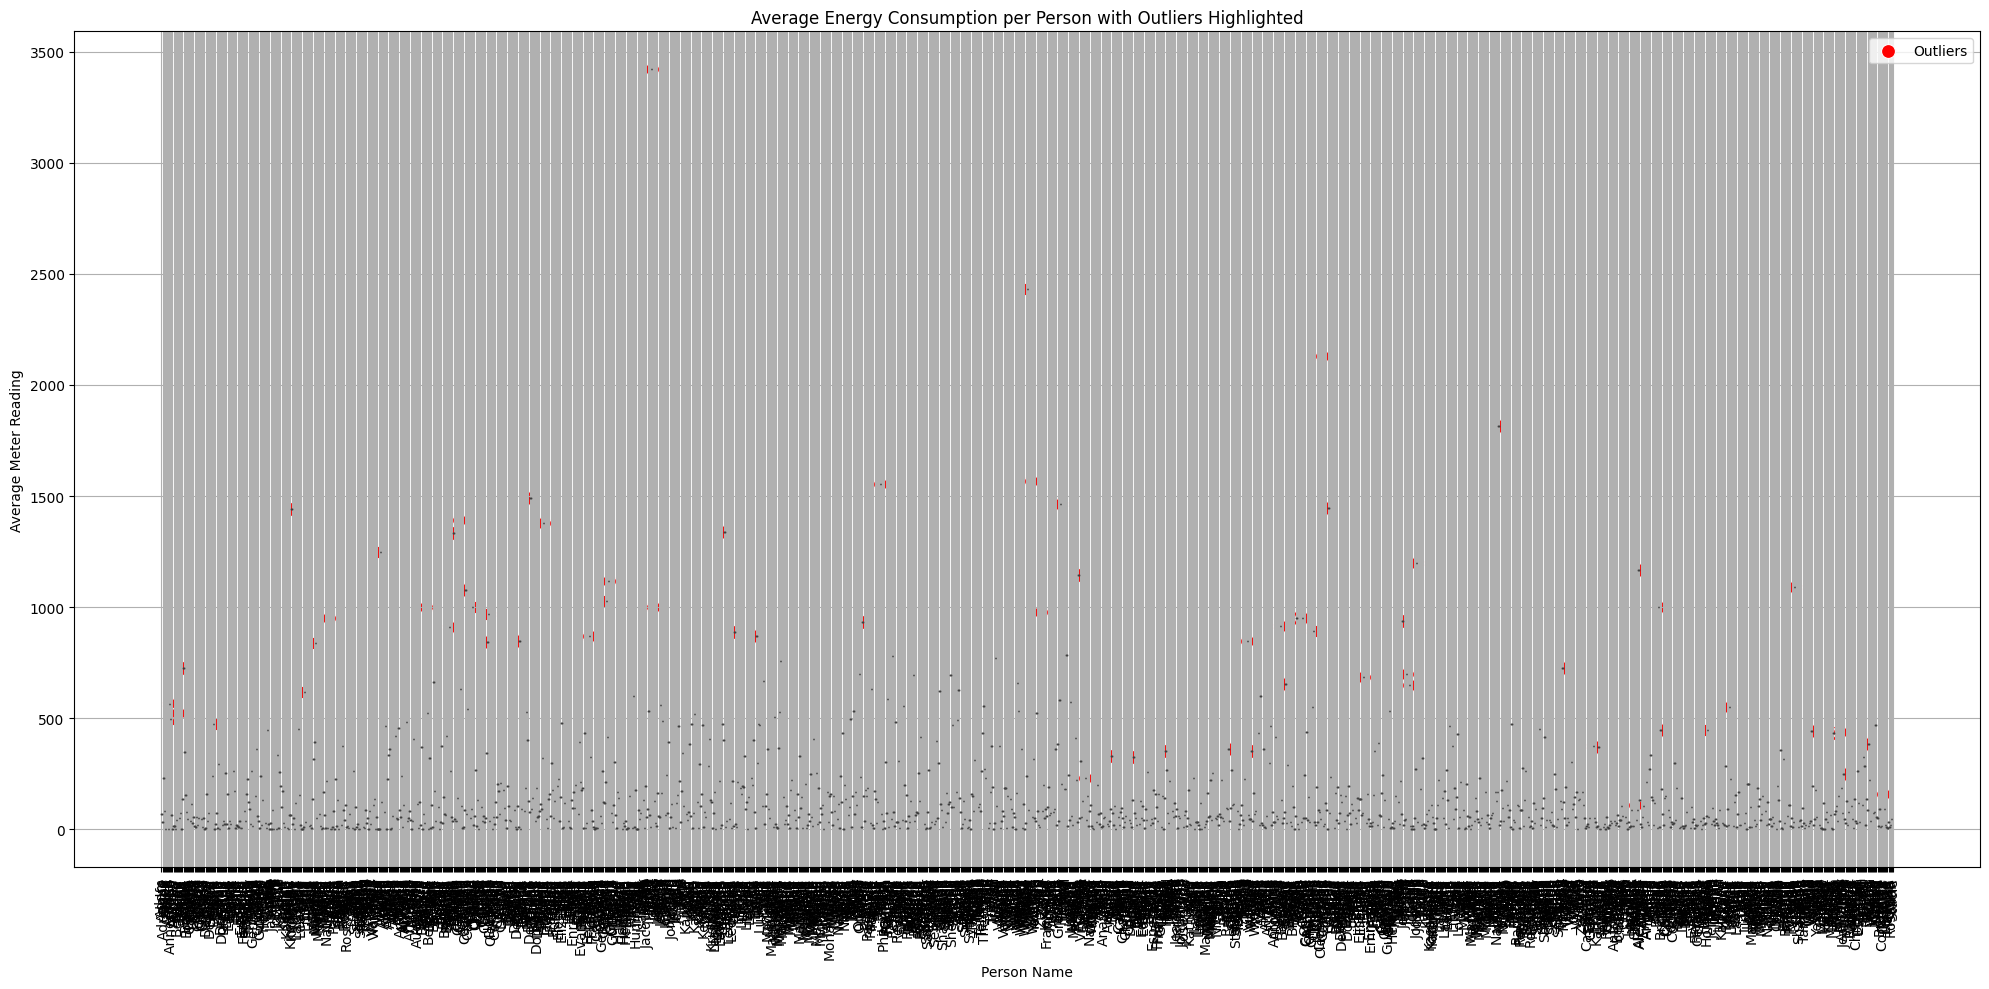

In [ ]:
# Scatter outliers on top
outliers = avg_reading[avg_reading['is_outlier']]

plt.figure(figsize=(20,10))

sns.boxplot(
    data=avg_reading,
    x='person_name',
    y='avg_meter_reading',
    showfliers=False
)

# Plot outliers manually
sns.scatterplot(
    data=outliers,
    x='person_name',
    y='avg_meter_reading',
    color='red',
    s=100,
    label='Outliers'
)

plt.title('Average Energy Consumption per Person with Outliers Highlighted')
plt.xlabel('Person Name')
plt.ylabel('Average Meter Reading')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Group by building_type and person_name
avg_reading = elec_long.groupby(['building_type', 'person_name'])['meter_reading'].mean().reset_index()
avg_reading.rename(columns={'meter_reading': 'avg_meter_reading'}, inplace=True)

# Find mu (mean) and sigma (std) per building type
stats = avg_reading.groupby('building_type')['avg_meter_reading'].agg(['mean', 'std']).reset_index()
stats.rename(columns={'mean': 'mu', 'std': 'sigma'}, inplace=True)

# Merge stats back into avg_reading
avg_reading = avg_reading.merge(stats, on='building_type', how='left')



In [ ]:
# Threshold
avg_reading['threshold'] = avg_reading['mu'] + 2 * avg_reading['sigma']

# Label if person is outlier
avg_reading['is_outlier'] = avg_reading['avg_meter_reading'] > avg_reading['threshold']

# Calculate how much they exceed
avg_reading['exceed_amount'] = avg_reading['avg_meter_reading'] - avg_reading['threshold']

# Filter only outliers
outliers = avg_reading[avg_reading['is_outlier']]

# Sort outliers by exceed_amount (descending)
outliers = outliers.sort_values(by='exceed_amount', ascending=False)

# Show important columns
outliers_display = outliers[['building_type', 'person_name', 'avg_meter_reading', 'threshold', 'exceed_amount']]

print(outliers_display)


     building_type person_name  avg_meter_reading   threshold  exceed_amount
445      education      Janell        3420.083375  782.187317    2637.896058
786      education      Willis        2433.478741  782.187317    1651.291424
1053        office       Colby        2128.527409  643.255847    1485.271562
1213        office         Nia        1813.383745  643.255847    1170.127898
118       assembly    Kimberly        1442.648094  458.721629     983.926465
...            ...         ...                ...         ...            ...
47        assembly      Denice         473.180195  458.721629      14.458566
1020        office       Betsy         654.090587  643.255847      10.834740
838     industrial         Jay         232.222331  221.861832      10.360500
1337       parking     Shannon         111.779021  103.875042       7.903979
1132        office        Jill         647.851902  643.255847       4.596054

[72 rows x 5 columns]


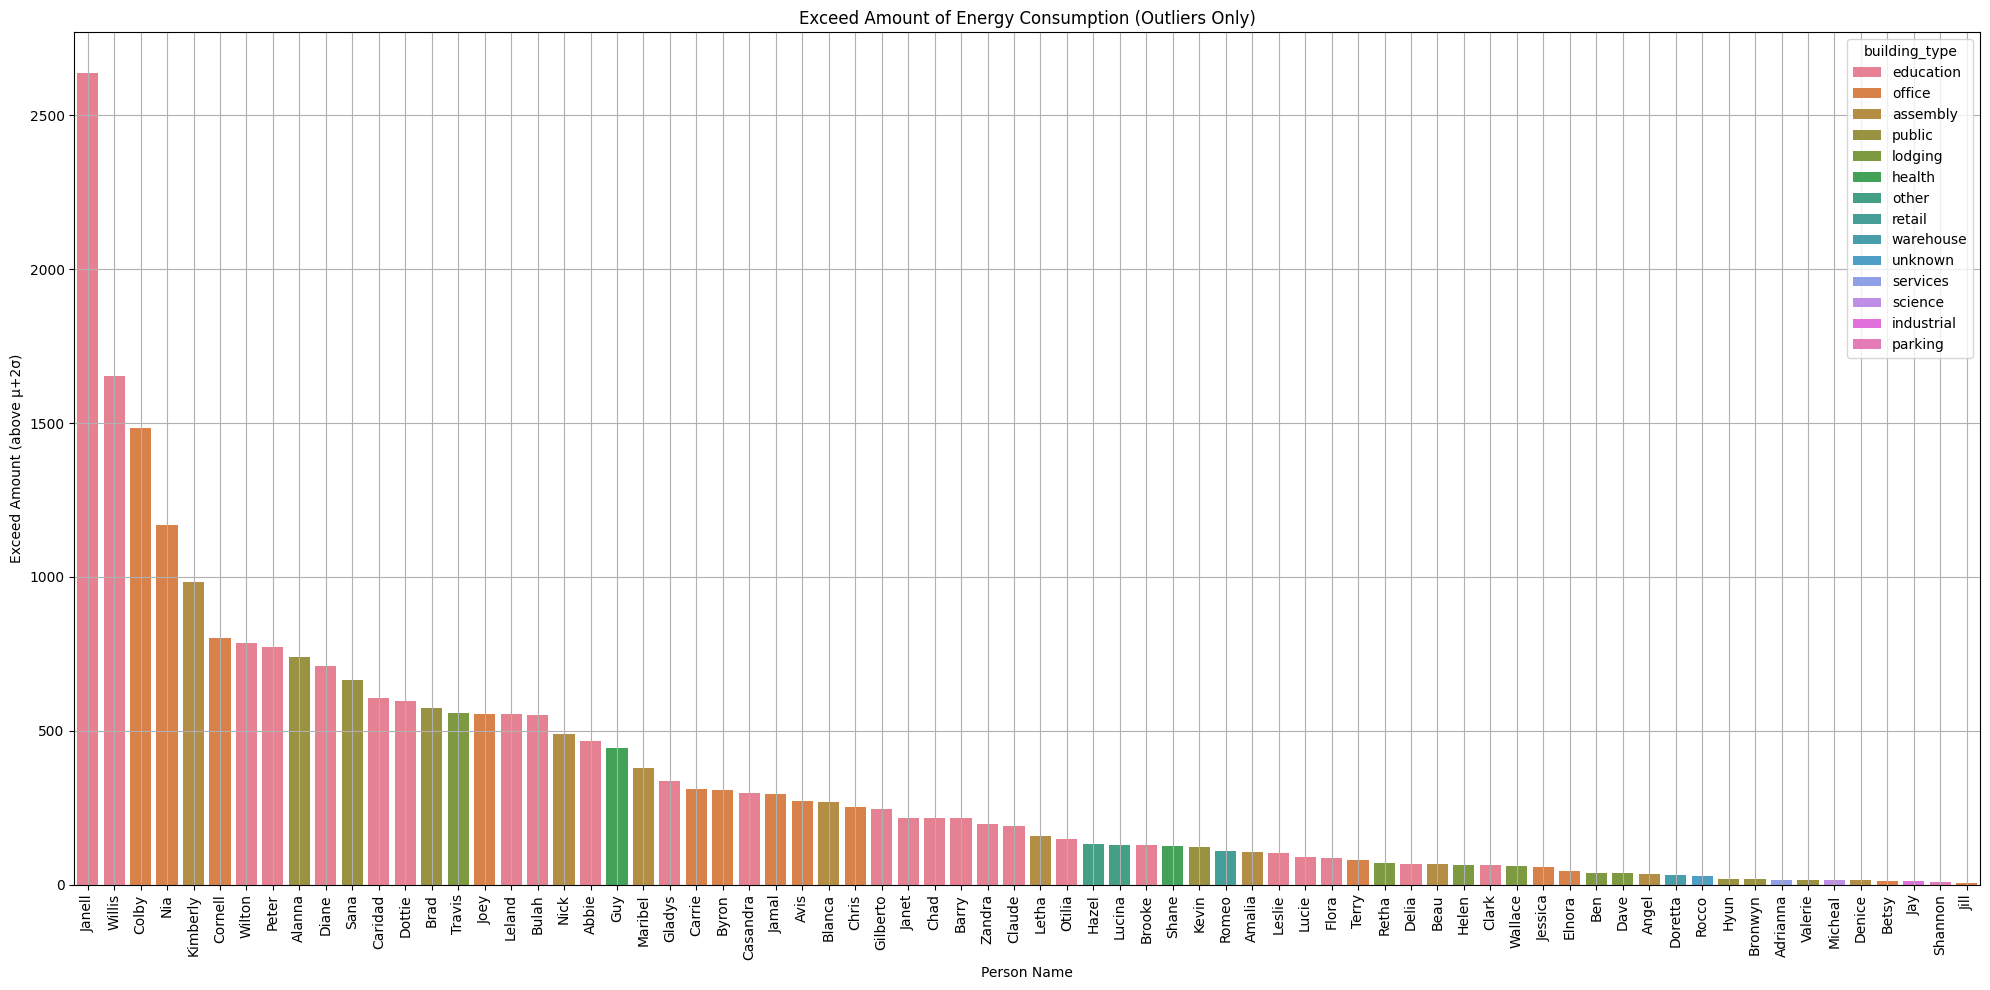

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))

sns.barplot(
    data=outliers_display,
    x='person_name',
    y='exceed_amount',
    hue='building_type',  # Color by building type
    dodge=False
)

plt.title('Exceed Amount of Energy Consumption (Outliers Only)')
plt.xlabel('Person Name')
plt.ylabel('Exceed Amount (above μ+2σ)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


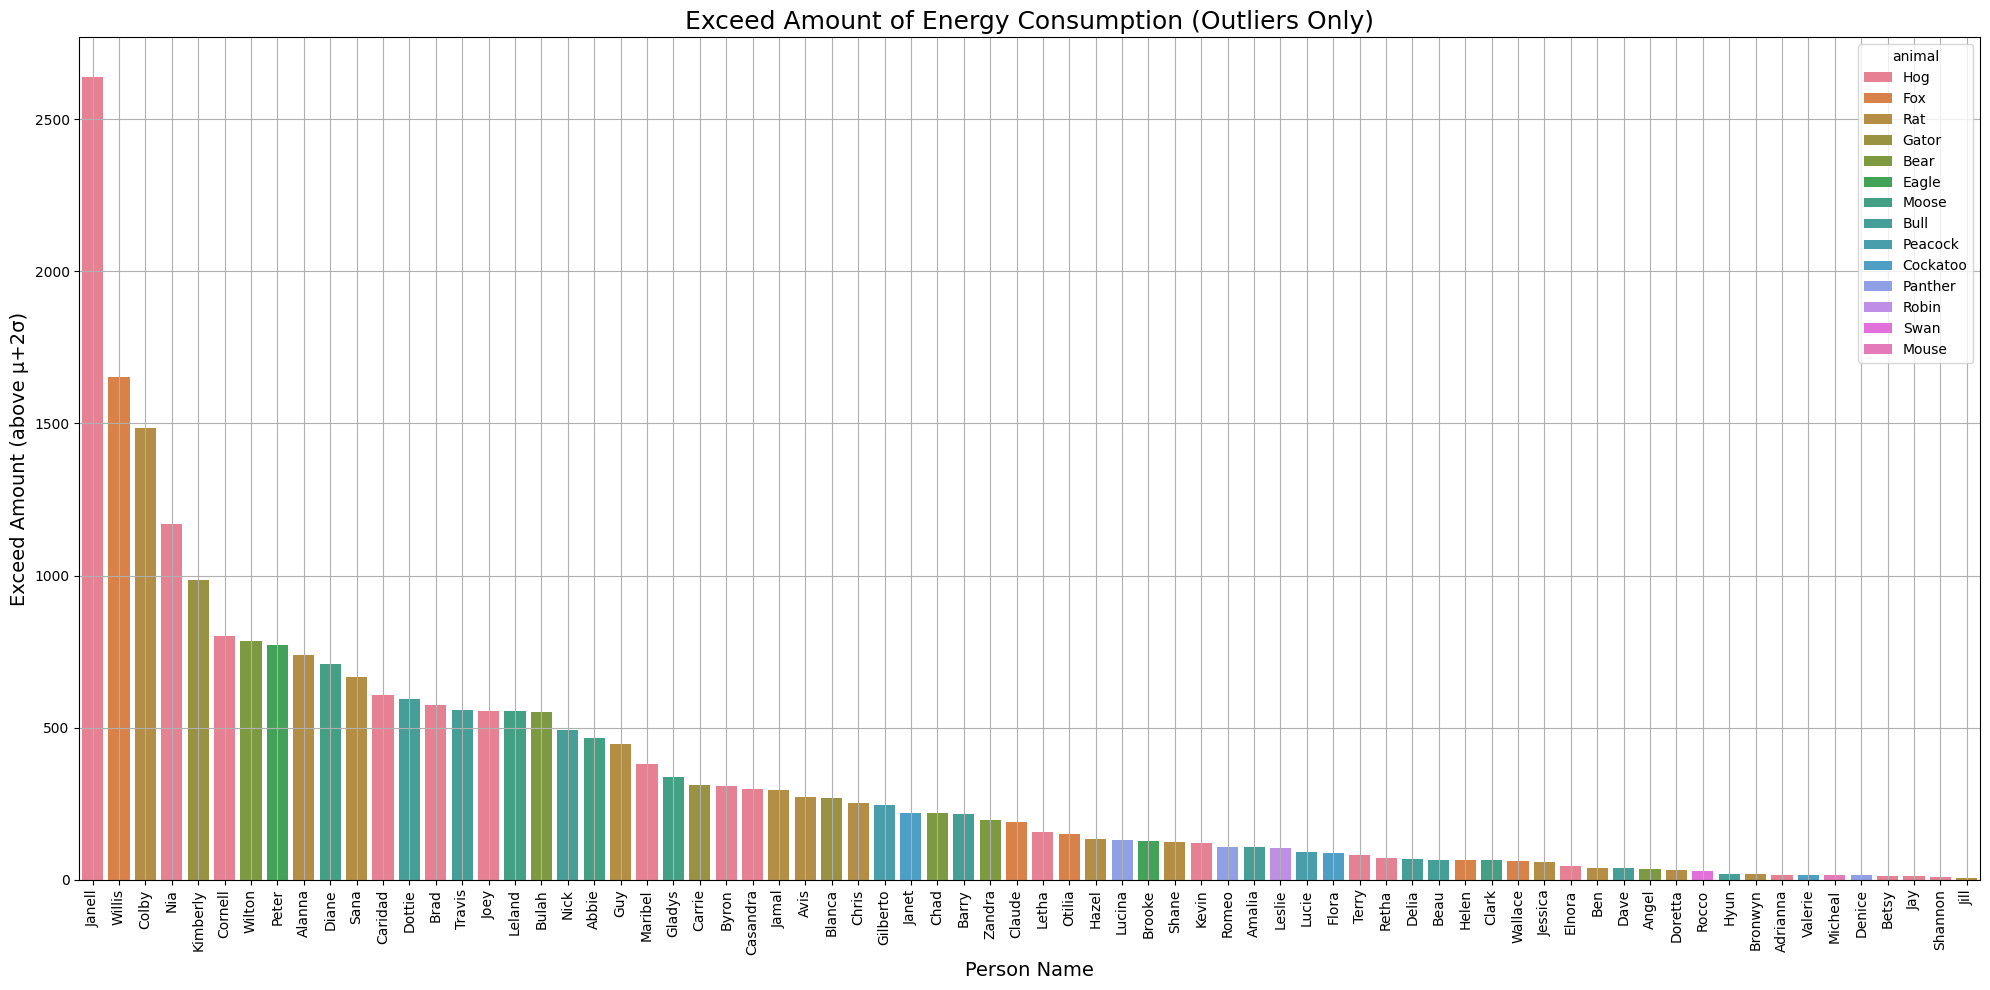

In [ ]:
# 🧹 Step 0: Preprocessing

# Split building_name into animal, building_type, person_name
if 'animal' not in elec_long.columns:
    building_split = elec_long['building_name'].str.split('_', expand=True)
    elec_long['animal'] = building_split[0]
    elec_long['building_type'] = building_split[1]
    elec_long['person_name'] = building_split[2]

# 🧮 Step 1: Calculate avg_meter_reading per person in each building_type
avg_reading = elec_long.groupby(['building_type', 'animal', 'person_name'])['meter_reading'].mean().reset_index()
avg_reading.rename(columns={'meter_reading': 'avg_meter_reading'}, inplace=True)

# 🧠 Step 2: Calculate mu and sigma for each building_type
stats = avg_reading.groupby('building_type')['avg_meter_reading'].agg(['mean', 'std']).reset_index()
stats.rename(columns={'mean': 'mu', 'std': 'sigma'}, inplace=True)

# Merge mu and sigma back to avg_reading
avg_reading = avg_reading.merge(stats, on='building_type', how='left')

# Step 3: Calculate threshold = mu + 2*sigma
avg_reading['threshold'] = avg_reading['mu'] + 2 * avg_reading['sigma']

# Step 4: Label outliers
avg_reading['is_outlier'] = avg_reading['avg_meter_reading'] > avg_reading['threshold']

# Step 5: Calculate exceed amount
avg_reading['exceed_amount'] = avg_reading['avg_meter_reading'] - avg_reading['threshold']

# Step 6: Keep only outliers
outliers = avg_reading[avg_reading['is_outlier']]

# Step 7: Keep relevant columns
outliers_display = outliers[['building_type', 'animal', 'person_name', 'avg_meter_reading', 'threshold', 'exceed_amount']]

# Step 8: Sort by exceed_amount descending
outliers_display = outliers_display.sort_values('exceed_amount', ascending=False)

# 🖼️ Step 9: Plotting

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))

sns.barplot(
    data=outliers_display,
    x='person_name',
    y='exceed_amount',
    hue='animal',     # Color by animal now ✅
    dodge=False
)

plt.title('Exceed Amount of Energy Consumption (Outliers Only)', fontsize=18)
plt.xlabel('Person Name', fontsize=14)
plt.ylabel('Exceed Amount (above μ+2σ)', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Group by building_type and person_name
avg_reading = elec_long.groupby(['building_type', 'person_name'])['meter_reading'].mean().reset_index()
avg_reading.rename(columns={'meter_reading': 'avg_meter_reading'}, inplace=True)

# Find mu (mean) and sigma (std) per building_type
stats = avg_reading.groupby('building_type')['avg_meter_reading'].agg(['mean', 'std']).reset_index()
stats.rename(columns={'mean': 'mu', 'std': 'sigma'}, inplace=True)

# Merge stats back
avg_reading = avg_reading.merge(stats, on='building_type', how='left')

# Threshold
avg_reading['threshold'] = avg_reading['mu'] + 2 * avg_reading['sigma']

# Label outliers
avg_reading['is_outlier'] = avg_reading['avg_meter_reading'] > avg_reading['threshold']

# List of outlier person names
outlier_persons = avg_reading.loc[avg_reading['is_outlier'], 'person_name'].unique()

print(f"Number of Outlier Persons: {len(outlier_persons)}")


Number of Outlier Persons: 72


In [ ]:
# Calculate mu + sigma (ONLY +1 sigma, because you're assuming improved behavior)
stats['mu_plus_sigma'] = stats['mu'] + stats['sigma']
#+ stats['sigma']
# Dictionary: building_type → mu+sigma
building_fix = stats.set_index('building_type')['mu_plus_sigma'].to_dict()

print(building_fix)


{'assembly': 100.48316555644806, 'education': 189.51444228053205, 'food': 82.75121931801472, 'health': 300.89327769248945, 'industrial': 76.27420876681227, 'lodging': 88.54276781138462, 'office': 147.27037831606157, 'other': 46.734944347179876, 'parking': 42.95051439595608, 'public': 95.51707048115094, 'religion': 4.285885059746742, 'retail': 78.07576517149192, 'science': 152.20715331426362, 'services': 91.23377708423371, 'unknown': 125.93965773594955, 'utility': 163.8011337506168, 'warehouse': 38.828075580865644}


In [ ]:
# Make a copy
elec_long_corrected = elec_long.copy()

# Old total energy
old_total_energy = elec_long_corrected['meter_reading'].sum()

# Apply corrections
def correct_meter(row):
    if row['person_name'] in outlier_persons:
        # If outlier, fix their meter reading
        return building_fix.get(row['building_type'], row['meter_reading'])
    else:
        # Otherwise, keep original
        return row['meter_reading']

elec_long_corrected['corrected_meter_reading'] = elec_long_corrected.apply(correct_meter, axis=1)

# New total energy
new_total_energy = elec_long_corrected['corrected_meter_reading'].sum()

# Calculate reduction
reduction_percentage = (old_total_energy - new_total_energy) / old_total_energy * 100

print(f"Old Total Energy: {old_total_energy:.2f}")
print(f"New Total Energy after Correction: {new_total_energy:.2f}")
print(f"Energy Reduction: {reduction_percentage:.2f}%")


Old Total Energy: 3653670996.30
New Total Energy after Correction: 2732758519.07
Energy Reduction: 25.21%


In [ ]:
# Precompute the "should be corrected" boolean mask
elec_long_corrected['is_outlier_person'] = elec_long_corrected['person_name'].isin(outlier_persons)

# Precompute corrected values
elec_long_corrected['fixed_meter_reading'] = elec_long_corrected['building_type'].map(building_fix)

# Where the person is an outlier, we use the fixed value, else original meter reading
elec_long_corrected['final_corrected'] = np.where(
    elec_long_corrected['is_outlier_person'],
    elec_long_corrected['fixed_meter_reading'],
    elec_long_corrected['meter_reading']
)


In [ ]:
import numpy as np

# How many bootstrap samples
n_bootstrap = 100
bootstrap_reductions = []

np.random.seed(42)

for _ in range(n_bootstrap):
    # Sample indices quickly
    sample_idx = np.random.choice(elec_long_corrected.index, size=len(elec_long_corrected), replace=True)

    # Sum original and corrected using sample
    old_total = elec_long_corrected.loc[sample_idx, 'meter_reading'].sum()
    new_total = elec_long_corrected.loc[sample_idx, 'final_corrected'].sum()

    reduction = (old_total - new_total) / old_total * 100
    bootstrap_reductions.append(reduction)


In [ ]:
# Calculate 95% confidence interval
lower_bound = np.percentile(bootstrap_reductions, 2.5)
upper_bound = np.percentile(bootstrap_reductions, 97.5)
mean_estimate = np.mean(bootstrap_reductions)

print(f"Bootstrap Mean Reduction: {mean_estimate:.2f}%")
print(f"95% Confidence Interval: ({lower_bound:.2f}%, {upper_bound:.2f}%)")


Bootstrap Mean Reduction: 25.20%
95% Confidence Interval: (25.16%, 25.24%)
